# Yelp Business Rating Regression Project

## Importing Data

In [1]:
# Import the modules we are going to use

# General-use modules
import pandas as pd
import numpy as np
from functools import reduce

# Visualisation modules
import seaborn as sns
from matplotlib import pyplot as plt

# Regression modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Import our json files and assign them to dataframes
business = pd.read_json("yelp_business.json", lines = True)
checkin = pd.read_json("yelp_checkin.json", lines = True)
photo = pd.read_json("yelp_photo.json", lines = True)
review = pd.read_json("yelp_review.json", lines = True)
tip = pd.read_json("yelp_tip.json", lines = True)
user = pd.read_json("yelp_user.json", lines = True)

In [3]:
# Adjust the column widths
pd.options.display.max_colwidth = 500

## Inspecting Data

In [4]:
# Inspect how many entries we have for each of our dataframes
dfs = [business,
       checkin,
       photo,
       review,
       tip,
       user]
for df in dfs:
    print(len(df))

188593
157075
32976
188593
121526
188593


It appears we have data on 188593 businesses.

In [5]:
# Describe the key features of the 'business' dataframe
business.describe()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,is_open,latitude,longitude,price_range,review_count,stars,take_reservations,takes_credit_cards
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000,188587.000000,188587.000000,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,0.140610,0.279029,0.350692,0.134968,0.830391,38.506793,-97.490873,1.035855,31.797310,3.631550,0.106086,0.700243
std,0.347619,0.448523,0.477188,0.341690,0.375290,5.122684,17.693360,1.037985,104.124212,1.016783,0.307948,0.458152
min,0.000000,0.000000,0.000000,0.000000,0.000000,-71.753941,-180.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,33.630878,-112.279276,0.000000,4.000000,3.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,36.143595,-111.777460,1.000000,9.000000,3.500000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,43.593106,-79.982958,2.000000,24.000000,4.500000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,85.051129,115.086769,4.000000,7968.000000,5.000000,1.000000,1.000000


In [6]:
# Inspect our 6 dataframes
business.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,...,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",...,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",...,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",...,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,...,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",...,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [7]:
checkin.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [8]:
photo.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [9]:
review.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [10]:
tip.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [11]:
user.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


## Merging Data

We are going to left merge the dataframes, starting with the business dataframe as this has the maximum number of entries (as well as the 'review' and 'user' dataframes), so we won't lose any data. We will merge on the **business_id** column as this is common among all dataframes.


In [12]:
# Left merge the data onto the 'business' dataframe
megaframe = reduce(lambda left, right: pd.merge(left, right, on=["business_id"], how="left"), dfs)

In [13]:
# Inspect our merged dataframe to ensure the merge was successful
megaframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   address                     188593 non-null  object 
 1   alcohol?                    188593 non-null  int64  
 2   attributes                  162807 non-null  object 
 3   business_id                 188593 non-null  object 
 4   categories                  188052 non-null  object 
 5   city                        188593 non-null  object 
 6   good_for_kids               188593 non-null  int64  
 7   has_bike_parking            188593 non-null  int64  
 8   has_wifi                    188593 non-null  int64  
 9   hours                       143791 non-null  object 
 10  is_open                     188593 non-null  int64  
 11  latitude                    188587 non-null  float64
 12  longitude                   188587 non-null  float64
 13  name          

We have now **combined** all of our **dataframes** into one big dataframe, **'megaframe'**. 
<br>
The data types also appear to be fine and do not require fixing, so we can move on to cleaning our dataframe.

## Cleaning Data

In [14]:
# Removing all of the object data types and unnecessary columns from our dataframe as we will not be using them in our model
megaframe.drop(labels=["address",
                       "attributes",
                       "business_id",
                       "categories",
                       "city",
                       "hours",
                       "name",
                       "neighborhood",
                       "postal_code",
                       "state",
                       "time",
                       "latitude",
                       "longitude"], axis=1, inplace=True)

In [15]:
# Inspect our dataframe once more to confirm we have removed the correct columns
megaframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   alcohol?                    188593 non-null  int64  
 1   good_for_kids               188593 non-null  int64  
 2   has_bike_parking            188593 non-null  int64  
 3   has_wifi                    188593 non-null  int64  
 4   is_open                     188593 non-null  int64  
 5   price_range                 188593 non-null  int64  
 6   review_count                188593 non-null  int64  
 7   stars                       188593 non-null  float64
 8   take_reservations           188593 non-null  int64  
 9   takes_credit_cards          188593 non-null  int64  
 10  weekday_checkins            157075 non-null  float64
 11  weekend_checkins            157075 non-null  float64
 12  average_caption_length      32976 non-null   float64
 13  number_pics   

We have successfully removed 13 columns.

In [16]:
# Check for any null values in our dataframe
megaframe.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
is_open                       False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
weekday_checkins               True
weekend_checkins               True
average_caption_length         True
number_pics                    True
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_tip_length             True
number_tips                    True
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
dtype: bool

We have **6** columns with null values.

In [17]:
# Inspecting our columns that contain null values
print("++++++++++++++++++ Weekday Checkins ++++++++++++++++++")
print(megaframe["weekday_checkins"].describe())

print("++++++++++++++++++ Weekend Checkins ++++++++++++++++++")
print(megaframe["weekend_checkins"].describe())

print("++++++++++++++++++ Average Caption Length ++++++++++++++++++")
print(megaframe["average_caption_length"].describe())

print("++++++++++++++++++ Number of Pics ++++++++++++++++++")
print(megaframe["number_pics"].describe())

print("++++++++++++++++++ Average Tip Length ++++++++++++++++++")
print(megaframe["average_tip_length"].describe())

print("++++++++++++++++++ Number of Tips ++++++++++++++++++")
print(megaframe["number_tips"].describe())

++++++++++++++++++ Weekday Checkins ++++++++++++++++++
count    157075.000000
mean         54.491873
std         361.550139
min           0.000000
25%           2.000000
50%           8.000000
75%          30.000000
max       73830.000000
Name: weekday_checkins, dtype: float64
++++++++++++++++++ Weekend Checkins ++++++++++++++++++
count    157075.000000
mean         59.567551
std         363.523671
min           0.000000
25%           2.000000
50%           7.000000
75%          31.000000
max       64647.000000
Name: weekend_checkins, dtype: float64
++++++++++++++++++ Average Caption Length ++++++++++++++++++
count    32976.000000
mean        16.195511
std         19.515889
min          0.000000
25%          0.000000
50%         11.333333
75%         23.875000
max        140.000000
Name: average_caption_length, dtype: float64
++++++++++++++++++ Number of Pics ++++++++++++++++++
count    32976.000000
mean         8.521106
std         18.780734
min          1.000000
25%          1.000000

Upon inspection, we can see the following categories have the same number of null values:
- **weekend_checkins** and **weekday_checkins**
- **average_caption_length** and **number_pics**
- **average_tip_length** and **number_tips**

It is a fair assumption to say that the nulls in these pairs are for the same entries.

In addition, we can see that the minimum value in **number_pics** and **number_tips** is 1. This likely means that the nulls we are seeing for these categories, and thus also **average_caption_length** and **average_tip_length**, should be 0's (i.e. no picture = no caption, no tip = no tip length). Therefore, we will replace these nulls with 0's.


In [18]:
# Replacing the null values in these 4 columns with 0's
megaframe.fillna({"average_caption_length":0,
                  "number_pics":0,
                  "average_tip_length":0,
                  "number_tips":0},
                  inplace = True)

In [19]:
# Confirm we have successfully replaced the nulls
megaframe.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
is_open                       False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
weekday_checkins               True
weekend_checkins               True
average_caption_length        False
number_pics                   False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_tip_length            False
number_tips                   False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
dtype: bool

The nulls have successfully been replaced.

This leaves **weekday_checkins** and **weekend_checkins** as the only remaining columns with nulls.

In [20]:
# Preview the weekday_checkins and weekend_checkins data to try and pinpoint the cause of the null values
print(megaframe["weekend_checkins"].head(10))
print(megaframe["weekday_checkins"].head(10))


0     18.0
1      1.0
2      5.0
3      0.0
4      0.0
5    440.0
6      0.0
7      NaN
8     54.0
9      3.0
Name: weekend_checkins, dtype: float64
0     11.0
1      0.0
2      2.0
3      1.0
4      2.0
5    345.0
6      1.0
7      NaN
8     75.0
9      5.0
Name: weekday_checkins, dtype: float64


It is not immediately clear what is causing the null values in **weekday_checkins** and **weekend_checkins**. Therefore, I believe we have 4 options:
<br>
**1)** Remove all of the rows with null values (31518 ~ 16.7% of the data)
<br>
**2)** Replace the null values with 0's
<br>
**3)** Impute the null values with the column mean
<br>
**4)** Remove the columns **weekday_checkins** and **weekend_checkins** entirely


**Option 1** means removing over 16% of our dataset for which we have values in all of the other columns, reducing the accuracy of our models.
<br>
**Options** **2**, **3** and **4** are preferable as they only involve manipulating the data in these 2 columns, meaning we won't comprimise the accuracy of our models when investigating other variables. 
<br>
To aid our decision, we can check the correlation between these 2 variables and our dependant variable, **stars**, to see if the checkin day is even an area worth looking into.

In [21]:
# Check the correlations between our variables
print("Weekday: " + str(megaframe["stars"].corr(megaframe["weekday_checkins"])))
print("Weekend: " + str(megaframe["stars"].corr(megaframe["weekend_checkins"])))

Weekday: 0.00797241883285439
Weekend: 0.012629770069502106


We can see the correlation between **stars** and **weekday_checkins** is **0.008**, and between **stars** and **weekend_checkins** is **0.013**. Both are very weak correlations, therefore we are comfortable with choosing **Option 4** and removing these categories altogether.

In [22]:
# Remove the weekday_checkins and weekend_checkins columns
megaframe.drop(labels=["weekday_checkins",
                       "weekend_checkins"], axis=1, inplace=True)

In [23]:
# Confirm we have removed these columns
megaframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   alcohol?                    188593 non-null  int64  
 1   good_for_kids               188593 non-null  int64  
 2   has_bike_parking            188593 non-null  int64  
 3   has_wifi                    188593 non-null  int64  
 4   is_open                     188593 non-null  int64  
 5   price_range                 188593 non-null  int64  
 6   review_count                188593 non-null  int64  
 7   stars                       188593 non-null  float64
 8   take_reservations           188593 non-null  int64  
 9   takes_credit_cards          188593 non-null  int64  
 10  average_caption_length      188593 non-null  float64
 11  number_pics                 188593 non-null  float64
 12  average_review_age          188593 non-null  float64
 13  average_review

We have successfully removed the **weekday_checkins** and **weekend_checkins** columns.

## Exploratory Analysis

In [24]:
# Explore the correlation between our dependant variable, stars, and the other variables, sorted by absolute size
megaframe_corr = megaframe.corr().sort_values(["stars"], key=abs, ascending=False)["stars"]
print(megaframe_corr)

stars                         1.000000
average_review_sentiment      0.782187
average_review_length        -0.277081
average_review_age           -0.125645
has_bike_parking              0.068084
average_review_count         -0.066572
average_number_years_elite   -0.064419
average_tip_length           -0.052899
price_range                  -0.052565
is_open                       0.051913
number_cool_votes             0.043375
alcohol?                     -0.043332
has_wifi                     -0.039857
average_days_on_yelp         -0.038061
takes_credit_cards            0.037748
review_count                  0.032413
average_number_fans          -0.031141
good_for_kids                -0.030382
take_reservations            -0.024486
number_tips                   0.014038
average_number_friends       -0.007629
number_pics                   0.001727
number_funny_votes            0.001320
number_useful_votes          -0.000066
average_caption_length        0.000040
Name: stars, dtype: float

As seen above, there appears to be a strong correlation between the review of a restaurant and the stars, which is unsurprising given that star rating is itself a form of review.
<br>
We will begin by modelling the following **4** independent variables:
<br>
- **average_review_sentiment**
<br>
- **average_review_length**
<br>
- **average_review_age**
<br>
- **average_review_count**

(There is little point including both **average_review_count** and **review_count**, so we have just gone with the former given its stronger correlation)

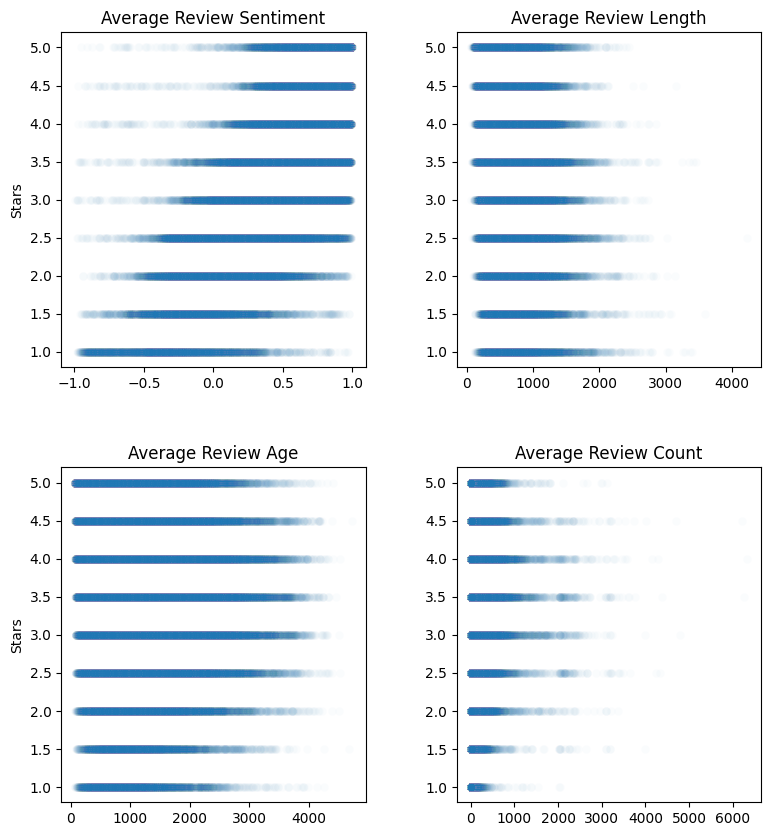

In [25]:
# Plot our 4 variables against stars to oberseve any immediately clear correlations
fig, axes = plt.subplots(2, 2, figsize=(8, 10))
plt.subplots_adjust(right=1, wspace=0.3, hspace=0.3)

# Average Review Sentiment
sns.scatterplot(ax=axes[0,0], data=megaframe, x="average_review_sentiment", y="stars", alpha=0.02)
axes[0,0].set(title="Average Review Sentiment", xlabel=None, ylabel="Stars")

# Average Review Length
sns.scatterplot(ax=axes[0,1], data=megaframe, x="average_review_length", y="stars", alpha=0.02)
axes[0,1].set(title="Average Review Length", xlabel=None, ylabel=None)

# Average Review Age
sns.scatterplot(ax=axes[1,0], data=megaframe, x="average_review_age", y="stars", alpha=0.02)
axes[1,0].set(title="Average Review Age", xlabel=None, ylabel="Stars")

# Average Review Count
sns.scatterplot(ax=axes[1,1], data=megaframe, x="average_review_count", y="stars", alpha=0.02)
axes[1,1].set(title="Average Review Count", xlabel=None, ylabel=None)

plt.show()


The only immediately clear correlation we can observe is the Yelp star rating increasing with the sentiment of the review, which is unsurprising as we know it has the strongest correlation of any variable in our dataset (0.782).

## Regression Modelling

### Review-related categories

In [26]:
# Assigning our review-related variables
x = megaframe[["average_review_sentiment", "average_review_length", "average_review_age", "average_review_count"]]
y = megaframe[["stars"]]

# Splitting our x and y data into train/test splits
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

# Introducing the linear regression module from scikit-learn and applying it to our training data
reviews_model = LinearRegression()
reviews_model.fit(x_train, y_train)

LinearRegression()

In [27]:
# Finding R^2 for our training set
reviews_model.score(x_train,y_train)

0.6568224943421095

In [28]:
# Finding R^2 for our test set
reviews_model.score(x_test,y_test)

0.6509401205559011

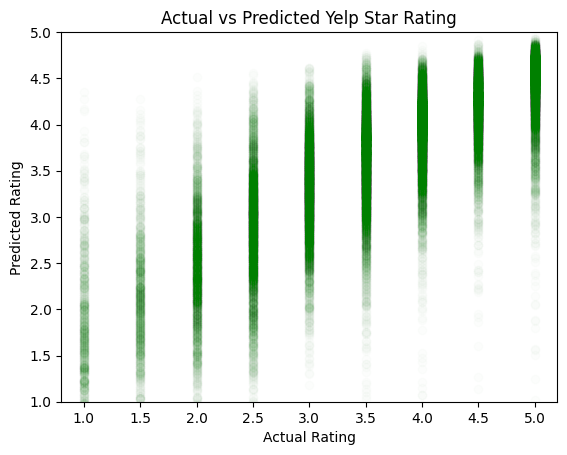

In [29]:
# Predict the Yelp star rating from our model
y_predict = reviews_model.predict(x_test)

# Create a scatter plot to visualise our predicted values against our test values, to help evaluate the accuracy of our model
review_scatter = plt.scatter(y_test, y_predict, alpha = 0.01, color="green")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Yelp Star Rating")
plt.ylim(1,5)
plt.show()

We can see that our model does a good job at predicting the Yelp rating from our test set, however there is the potential that we have overfit the data with too many weakly-correlated variables.
<br>
If we print out our slope coefficients, we can get more of an idea. 

In [30]:
# Print out our slope coefficients for our reviews model
print(reviews_model.coef_)

[[ 2.25666118e+00 -5.80072105e-04 -1.27056109e-04 -3.21435607e-04]]


The only variable responsible for any meaningful amount of variance within our Yelp ratings is the **average_review_sentiment**. The remaining 3 variables have very little influence themselves and we have likely overfit our data.

If we create a model using only **average_review_sentiment**, we can get a better idea of how much of an effect these other variables have (we know R^2 will decrease, but by how much we do not know).

### Review sentiment only

In [31]:
# Assigning our variables
x = megaframe[["average_review_sentiment"]]
y = megaframe[["stars"]]

# Splitting our x and y data into train/test splits
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

# Introducing the linear regression module from scikit-learn and applying it to our training data
sentiment_model = LinearRegression()
sentiment_model.fit(x_train, y_train)

LinearRegression()

In [32]:
# Finding R^2 for our training set
sentiment_model.score(x_train,y_train)

0.6132959007770209

In [33]:
# Finding R^2 for our test set
sentiment_model.score(x_test,y_test)

0.6057981814017657

The R^2 value has decreased by only around 4.5% for both the train and test sets when dropping 3 of our 4 variables, indicating that our previous model was overfit.

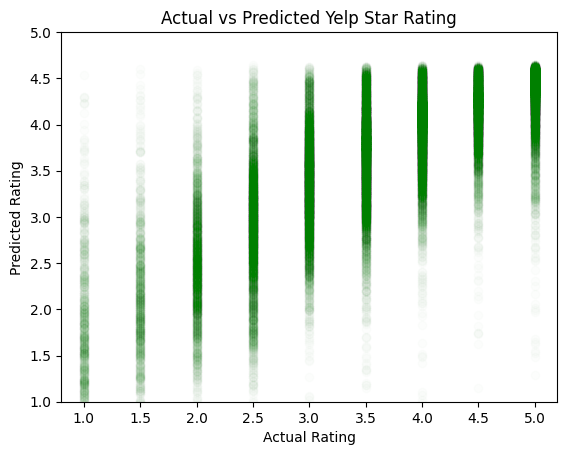

In [34]:
# Predict the Yelp star rating from our model
y_predict = sentiment_model.predict(x_test)

# Create a scatter plot to visualise our predicted values against our test values
sentiment_scatter = plt.scatter(y_test, y_predict, alpha = 0.01, color="green")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Yelp Star Rating")
plt.ylim(1,5)
plt.show()

The sentiment-only model still does a good job in modelling the Yelp rating on our test data, although the difference is still somewhat noticeable when observing higher brackets of predicted/actual star rating. 

### Model Function

As we will wish to model many other variables and their effects in the future, we will make a function that creates and scores a model from only an inputted list of variables.

In [35]:
def model_function(categories):

    # Splitting our x and y data into train/test splits
    x_train, x_test, y_train, y_test = train_test_split(megaframe[categories], megaframe[["stars"]], train_size=0.8, test_size=0.2, random_state=6)

    # Introducing the linear regression module from scikit-learn and applying it to our training data
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Finding R^2 for our training set
    print("Train score: " + str(model.score(x_train,y_train)))

    # Finding R^2 for our test set
    print("Train score: " + str(model.score(x_test,y_test)))

    # Predict the Yelp star rating from our model
    y_predict = model.predict(x_test)

    # Print the slope coefficients for our independent variables
    print("Coefficients: " + str(model.coef_))

    # Create a scatter plot to visualise our predicted values against our test values
    model_scatter = plt.scatter(y_test, y_predict, alpha = 0.01, color="red")
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title("Actual vs Predicted Yelp Star Rating")
    plt.ylim(1,5)
    plt.show()

    return
    

In [36]:
# Repeat the list of categories we have and their correlation to 'stars', for convenience
print(megaframe_corr)

stars                         1.000000
average_review_sentiment      0.782187
average_review_length        -0.277081
average_review_age           -0.125645
has_bike_parking              0.068084
average_review_count         -0.066572
average_number_years_elite   -0.064419
average_tip_length           -0.052899
price_range                  -0.052565
is_open                       0.051913
number_cool_votes             0.043375
alcohol?                     -0.043332
has_wifi                     -0.039857
average_days_on_yelp         -0.038061
takes_credit_cards            0.037748
review_count                  0.032413
average_number_fans          -0.031141
good_for_kids                -0.030382
take_reservations            -0.024486
number_tips                   0.014038
average_number_friends       -0.007629
number_pics                   0.001727
number_funny_votes            0.001320
number_useful_votes          -0.000066
average_caption_length        0.000040
Name: stars, dtype: float

Train score: 0.002177108252337856
Train score: 0.00229525550411136
Coefficients: [[-0.03997642 -0.11154572]]


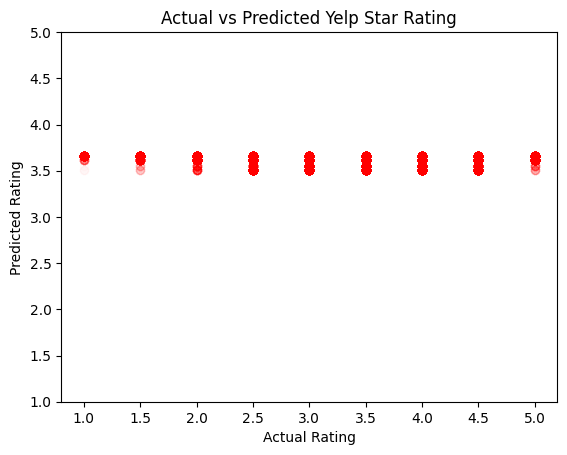

In [37]:
# Create a list for our chosen variables that will be investigated in our model
categories = [
    
# Input column names here:    
    "good_for_kids", 
    "alcohol?"
]

# Run the model function we created on the categories we have chosen
model_function(categories)

We have learnt that reviews are crucial in helping to predict a restaurant's Yelp rating and that they are responsible for a significant portion of the rating's variance. However, as reviews are posted retrospectively (or at least no earlier than a customer arriving at the restaurant), it would be useful to know if there is anything we can do that would help us predict our rating before we open for business. What kind of restaurant features should we focus on if we were to open tomorrow, prior to any customer's arrival? Would we be able to accurately predict the Yelp star rating of our restaurant given it is yet to receive a review?

We will put all of the variables that do not involve a review/subjective opinion into our model and observe the effect. 

Train score: 0.01931820981601584
Train score: 0.017413091732117802
Coefficients: [[ 0.2269723  -0.09958568  0.07879378 -0.10874497 -0.12938624  0.13560934
   0.07748517]]


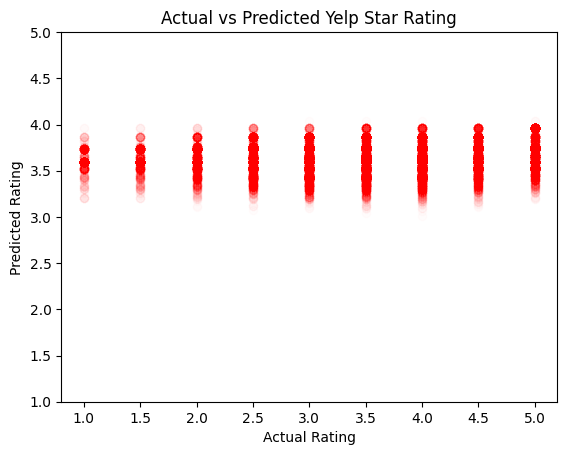

In [38]:
# Make a list of our variables
categories = [
    "has_bike_parking",
    "price_range",
    "is_open",
    "alcohol?",
    "has_wifi",
    "takes_credit_cards",
    "take_reservations",
]
    


# Run the model
model_function(categories)

Unfortunately, these factors do a very poor job of explaining the varaince within our Yelp rating, outputting an R^2 value of less than 2%. Whilst disappointing, this leaves plenty of scope for future work on this project. There are a vast number of variables that we have not considered yet. Perhaps there are pairs of variables that strongly correlate. 
<br>
A restaurant's cuisine coupled with its location could be much more telling than looking at either of these seperately. We already have a lot of data on locations that we removed early on in our analysis due to their object data type posing issues with our model. However, there are workarounds, such as seperating the cities by country. For example, we could use boolean masks to filter out all entries that reference Canadian cities. Then, if we obtained data on the cuisine a restaurant serves, we convert these strings to binaries where a value of 1 is assigned if the cuisine matches that description, or 0 if it does not (e.g. a restaurant in the column 'is_mexican' would have a value of 1 if the restaurant serves Mexican food). We would then be able to create a model that would (hopefully) help us predict the Yelp rating of a new Mexican restaurant in Vancouver.

## Conclusion

- What have we done in this project? Create a multiple linear regression model that investigates some of the key factors at play behind a restuarants Yelp rating.
- Main takeaways - it appears reviews are crucial part to predicting a restuarants success.
- Areas for improvement
- Future work - what other features could be looked at to predict a restaurants Yelp star rating? seating arrangement/number of chairs per table? cuisine?  